## Tugas belajar mandiri praktikum Text Analytic

## Data Judul Berita tentang 'Puan Maharani' pada halaman berita detik.com


Data diperoleh dengan menscrap data judul berita sebanyak 540 teks judul dari Bulan Desember 2022 - Maret 2023

Berikut data hasil scraping

In [7]:
import pandas as pd
berita = pd.read_csv("puan_maharani.csv",sep=",")
berita.head()

,date,title
0,"Jumat, 24 Mar 2023 21:58 WIB",Puan Akan Renovasi Rumah Betang untuk Lestarik...
1,"Jumat, 24 Mar 2023 18:34 WIB",Menerka Makna 'Serba 2' Usai Puan dan Jokowi B...
2,"Jumat, 24 Mar 2023 16:48 WIB","Bertemu Jokowi, Puan Maharani Bahas Persiapan ..."
3,"Jumat, 24 Mar 2023 15:49 WIB",PDIP Tunggu Apa Lagi?
4,"Jumat, 24 Mar 2023 14:23 WIB",Puan Bahas Pemenangan 2024 di Pertemuan 'Serba...


Melihat banyaknya baris dan kolom di data

In [6]:
berita.shape

(400, 2)

Selanjutnya kita akan ambil kolom **title** saja untuk dianalisis

In [8]:
berita = berita.filter(["title"])

In [9]:
def print_text_in_df(doc):
  for row in range(0,doc.shape[0]):
    print(doc.iloc[row,0],"\n\n")

In [10]:
print_text_in_df(berita.head())

Puan Akan Renovasi Rumah Betang untuk Lestarikan Tenun Khas Sintang 


Menerka Makna 'Serba 2' Usai Puan dan Jokowi Bertemu di Istana 


Bertemu Jokowi, Puan Maharani Bahas Persiapan Pemilu 2024 


PDIP Tunggu Apa Lagi? 


Puan Bahas Pemenangan 2024 di Pertemuan 'Serba 2' dengan Jokowi 




Kita pastikan terlebih dahulu apakah text yang kita miliki ada missing value atau tidak

In [11]:
print("Jumlah amatan NaN adalah",berita.isnull().sum())
print("Contoh amatan yang NAN")
berita["title"].loc[berita["title"].isnull()].head()

Jumlah amatan NaN adalah title    0
dtype: int64
Contoh amatan yang NAN


Series([], Name: title, dtype: object)

## Text Preprocessing

In [12]:
! pip install Pysastrawi

     -------------------------------------- 210.6/210.6 kB 1.8 MB/s eta 0:00:00


In [15]:
import re
import string
from spacy.lang.id import Indonesian
from spacy.lang.id.stop_words import STOP_WORDS
import spacy
nlp = Indonesian()
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory


import kamus bahasa baku

In [16]:
indo_slang_word = pd.read_csv("https://raw.githubusercontent.com/nasalsabila/kamus-alay/master/colloquial-indonesian-lexicon.csv")


Mendefinisikan fungsi text preprocessing dengan menampilkan setiap langkahnya

In [17]:
def my_tokenizer_print(doc):
  print("punctuation removal+menghapus angka\n")
  doc2 = doc.translate(str.maketrans('', '', string.punctuation + string.digits))
  print(doc2,"\n\n")
  print("whitespace removal\n")
  doc3 = doc2.strip()
  print(doc3,"\n\n")
  print("word tokenization\n")
  doc4 = nlp(doc3)
  doc_token1 = [token.text for token in doc4]
  print(doc_token1,"\n\n")
  print("Text Normalization/Noise Removal\n")
  for index in  range(0,len(doc_token1)-1):
        index_slang = indo_slang_word.slang==doc_token1[index]
        formal = list(set(indo_slang_word[index_slang].formal))
        if len(formal)==1:
            doc_token1[index]=formal[0] 
  print(doc_token1,"\n\n")
  print("Stopwords Removal\n")
  doc_token2 = [word for word in doc_token1 if word not in STOP_WORDS]
  print(doc_token2,"\n\n")
  print("Stemming/Lemmatization\n")
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  doc_token3 = [stemmer.stem(word) for word in doc_token2]
  print(doc_token3,"\n\n")
  print("menghapus spasi pada list\n")
  doc_token4 = list(filter(lambda word: word != "", doc_token3))
  print(doc_token4,"\n\n")

uji coba fungsi text preprocessing

In [18]:
my_tokenizer_print(berita.iloc[100,0])

punctuation removal+menghapus angka

Duet PrabowoGanjar Diprediksi Tak Mudah Dikalahkan 


whitespace removal

Duet PrabowoGanjar Diprediksi Tak Mudah Dikalahkan 


word tokenization

['Duet', 'PrabowoGanjar', 'Diprediksi', 'Tak', 'Mudah', 'Dikalahkan'] 


Text Normalization/Noise Removal

['Duet', 'PrabowoGanjar', 'Diprediksi', 'Tak', 'Mudah', 'Dikalahkan'] 


Stopwords Removal

['Duet', 'PrabowoGanjar', 'Diprediksi', 'Tak', 'Mudah', 'Dikalahkan'] 


Stemming/Lemmatization

['duet', 'prabowoganjar', 'prediksi', 'tak', 'mudah', 'kalah'] 


menghapus spasi pada list

['duet', 'prabowoganjar', 'prediksi', 'tak', 'mudah', 'kalah'] 




medefinisikan fungsi text preprocessing fixed

In [19]:
def my_tokenizer(doc):
 
  # punctuation removal+menghapus angka
  doc2 = doc.translate(str.maketrans('', '', string.punctuation + string.digits))
  # whitespace removal
  doc3 = doc2.strip()
  # word tokenization
  doc4 = nlp(doc3)
  doc_token1 = [token.text for token in doc4]
  # Text Normalization/Noise Removal]
  for index in  range(0,len(doc_token1)-1):
        index_slang = indo_slang_word.slang==doc_token1[index]
        formal = list(set(indo_slang_word[index_slang].formal))
        if len(formal)==1:
            doc_token1[index]=formal[0] 
  #Stopwords Removal
  doc_token2 = [word for word in doc_token1 if word not in STOP_WORDS]
  #Stemming/Lemmatization
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  doc_token3 = [stemmer.stem(word) for word in doc_token2]
  # menghapus spasi pada list
  doc_token4 = list(filter(lambda word: word != "", doc_token3))
  return doc_token4

In [20]:
print(my_tokenizer(berita.iloc[100,0]))

['duet', 'prabowoganjar', 'prediksi', 'tak', 'mudah', 'kalah']


## Bag of Words

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from yellowbrick.text import  FreqDistVisualizer

In [22]:
pd.options.plotting.backend = "plotly"
def doc_plot(bow,vectorizer,n=10,desc=True):
  feature_names = vectorizer.get_feature_names_out()
  bow_result_df = pd.DataFrame(bow.toarray())
  bow_result_df = bow_result_df.sum(axis=0).T.to_frame(name="BoW")
  bow_result_df["feature_names"] = feature_names
  if(desc):
    fig1 = bow_result_df.nlargest(n,"BoW").plot.barh(y="feature_names",x="BoW",text="BoW",text_auto=True)
  else:
    fig1 = bow_result_df.nsmallest(n,"BoW").plot.barh(y="feature_names",x="BoW",text="BoW",text_auto=True)
  fig1.update_traces(marker_color='darkblue')
  fig1.update_layout(yaxis={'categoryorder':'total ascending'})
  fig1.show()

### Frequency Vectorizer

In [23]:
count_vectorizer = CountVectorizer(tokenizer=my_tokenizer,lowercase=True)
count_result = count_vectorizer.fit_transform(berita.title)

In [24]:
print("Banyaknya document x banyaknya vocabulary")
print(count_result.toarray().shape)

Banyaknya document x banyaknya vocabulary
(540, 1137)


In [25]:
doc_plot(count_result,count_vectorizer,n=10)

In [26]:
doc_plot(count_result,count_vectorizer,n=10,desc=False)

In [27]:
count_vectorizer = CountVectorizer(tokenizer=my_tokenizer,lowercase=True,min_df=5)
count_result = count_vectorizer.fit_transform(berita.title)

In [28]:
print("Banyaknya document x banyaknya vocabulary")
print(count_result.toarray().shape)

Banyaknya document x banyaknya vocabulary
(540, 162)


In [29]:
doc_plot(count_result,count_vectorizer,n=10,desc=False)

### Term frequency– Inverse Document Frequency (TF-IDF)

In [30]:
tf_idf_vectorizer = TfidfVectorizer(tokenizer=my_tokenizer,lowercase=True, min_df=5)
tf_idf_result = tf_idf_vectorizer.fit_transform(berita.title)

In [31]:
print("Banyaknya document x banyaknya vocabulary")
print(tf_idf_result.toarray().shape)

Banyaknya document x banyaknya vocabulary
(540, 162)


## Metode Clustering

### K-Means

Untuk menjalankan K-Means kita akan menggunakan **KMeans** dimana **KMeans** versi ini tidak **scaleable** dibandingkan dengan **
**MiniBatchKMeans** yang biasa 

In [32]:
from sklearn.cluster import KMeans
kmeans = KMeans(random_state=5)

In [33]:
import warnings
warnings.filterwarnings('ignore')

#### Memilih Jumlah Cluster Optimum

In [34]:
from yellowbrick.cluster import KElbowVisualizer

##### Metric Within Sum of Square (WSS)

In [35]:
kmeans_vis_wss1 = KElbowVisualizer(kmeans, k=(2,12),metric="distortion")
kmeans_vis_wss2 = KElbowVisualizer(kmeans, k=(2,12),metric="distortion")

Dengan Frequency Vectorizer

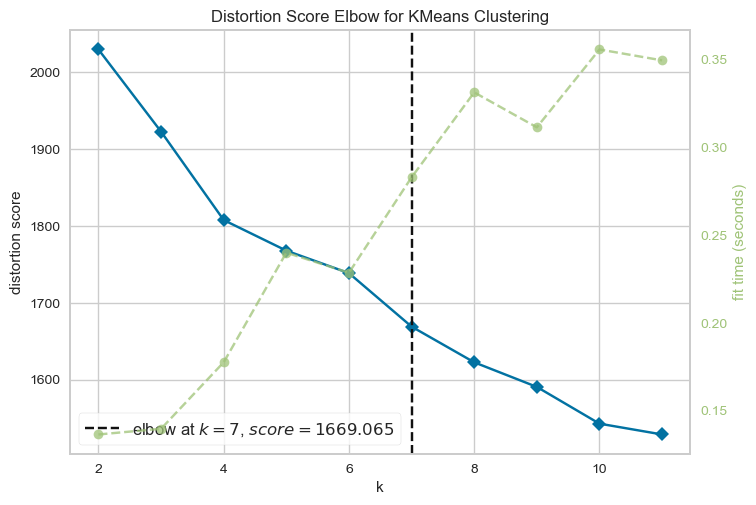

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [36]:
kmeans_vis_wss1.fit(count_result)        # Fit the data to the visualizer
kmeans_vis_wss1.show()        # Finalize and render the figure

Metric TF-IDF Vectorizer

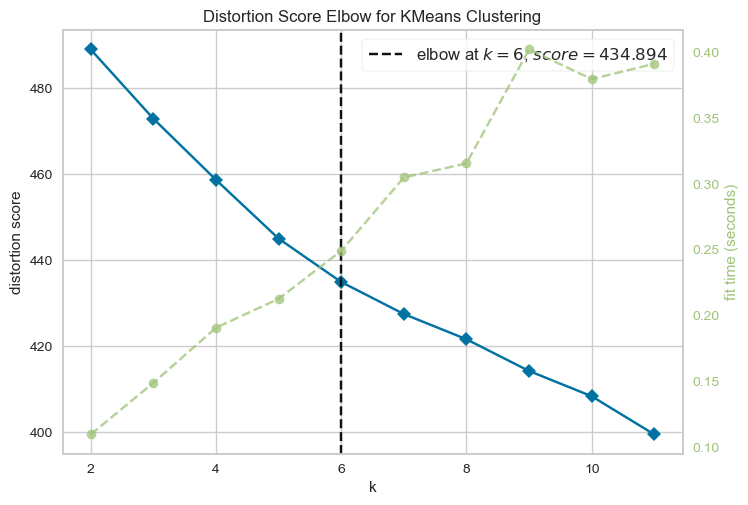

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [37]:
kmeans_vis_wss2.fit(tf_idf_result)        # Fit the data to the visualizer
kmeans_vis_wss2.show()        # Finalize and render the figure

##### Metric Silhouette

In [38]:
kmeans_vis_sil1 = KElbowVisualizer(kmeans, k=(2,12),metric="silhouette")
kmeans_vis_sil2 = KElbowVisualizer(kmeans, k=(2,12),metric="silhouette")

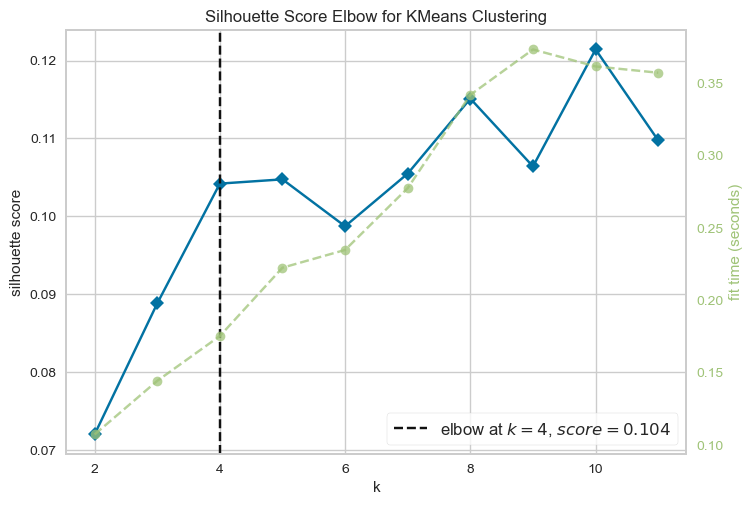

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [39]:
kmeans_vis_sil1.fit(count_result)        # Fit the data to the visualizer
kmeans_vis_sil1.show()        # Finalize and render the figure

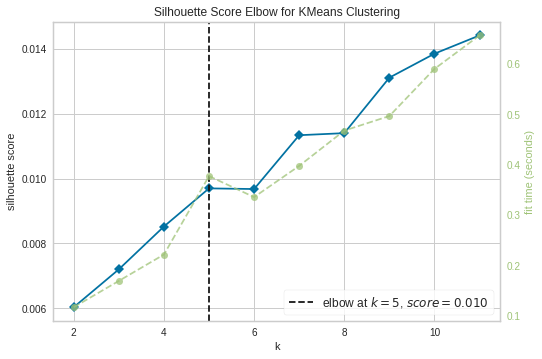

In [ ]:
kmeans_vis_sil2.fit(tf_idf_result)        # Fit the data to the visualizer
kmeans_vis_sil2.show()        # Finalize and render the figure

##### Metric Calinski-Harabasz

In [40]:
kmeans_vis_ch1 = KElbowVisualizer(kmeans, k=(2,12),metric="calinski_harabasz")
kmeans_vis_ch2 = KElbowVisualizer(kmeans, k=(2,12),metric="calinski_harabasz")

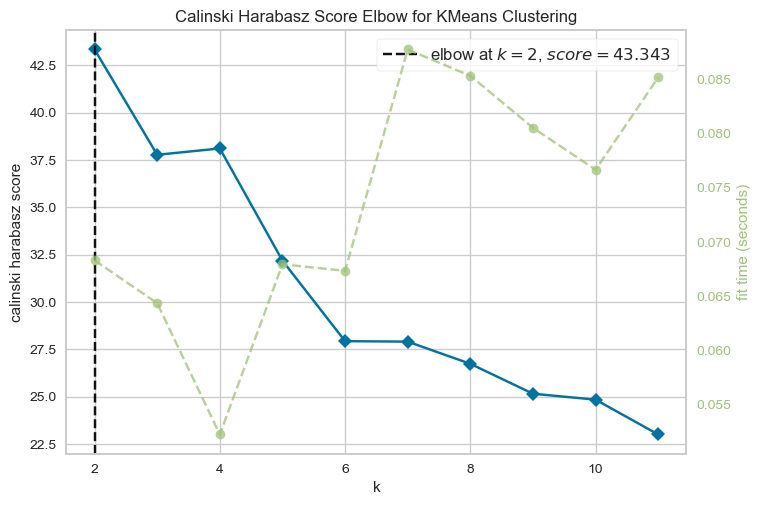

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [41]:
kmeans_vis_ch1.fit(count_result.toarray())        # Fit the data to the visualizer
kmeans_vis_ch1.show()        # Finalize and render the figure

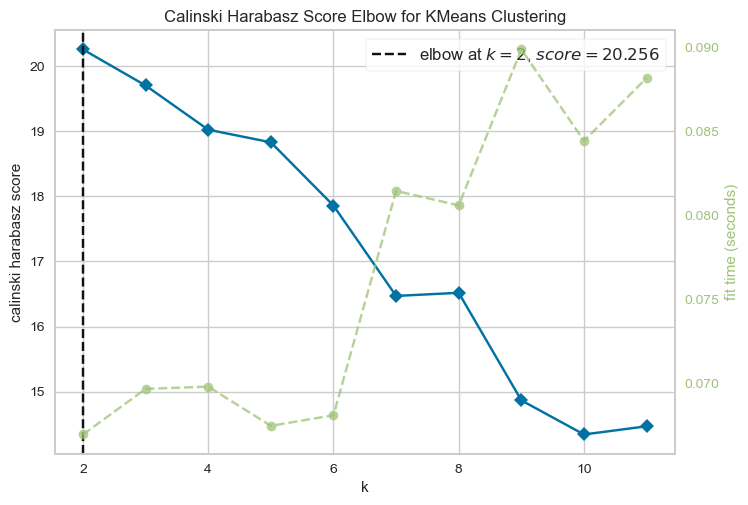

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [42]:
kmeans_vis_ch2.fit(tf_idf_result.toarray())        # Fit the data to the visualizer
kmeans_vis_ch2.show()        # Finalize and render the figure

##### Visualisasi dengan metode reduksi dimensi

###### PCA

In [43]:
from yellowbrick.features import PCA

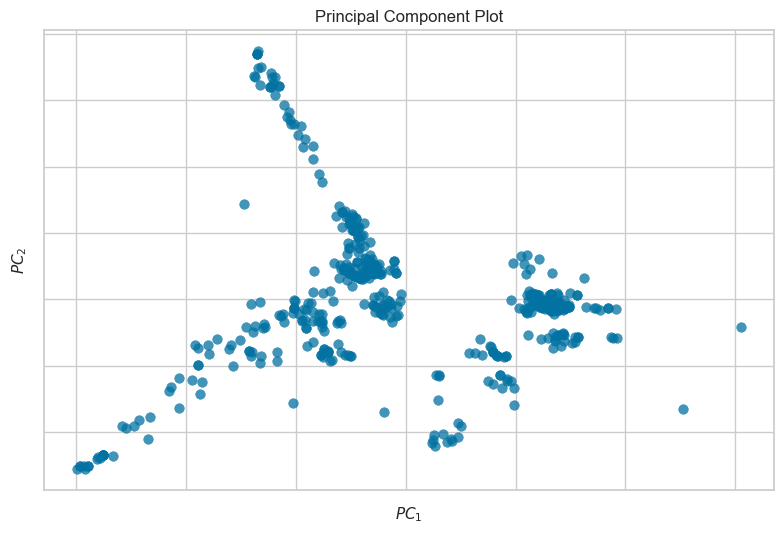

<AxesSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [44]:
pca1 = PCA(scale=False,projection=2,random_state=5)
pca1.fit_transform(count_result.toarray())
pca1.show()

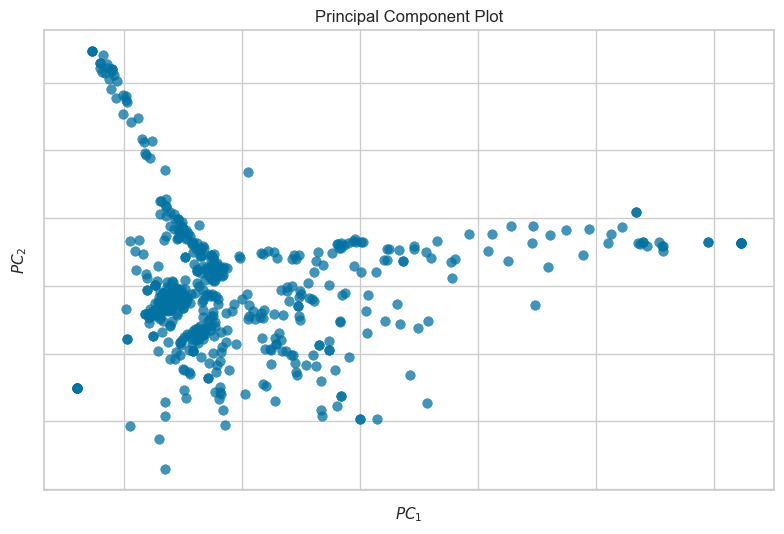

<AxesSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [45]:
pca2 = PCA(scale=False,projection=2,random_state=5)
pca2.fit_transform(tf_idf_result.toarray())
pca2.show()

###### t-SNE (t-distributed stochastic neighbor embedding)

In [47]:
from yellowbrick.text import TSNEVisualizer
tsne1 = TSNEVisualizer(decompose_by=50,random_state=5,n_iter=5000)
tsne2 = TSNEVisualizer(decompose_by=50,random_state=5,n_iter=5000)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


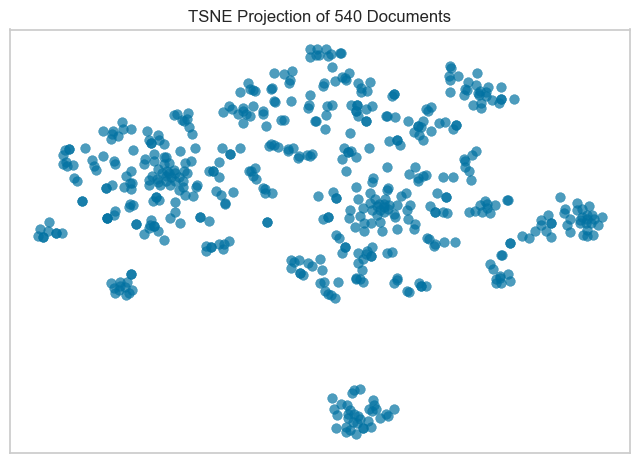

<AxesSubplot:title={'center':'TSNE Projection of 540 Documents'}>

In [48]:
tsne1.fit(count_result)
tsne1.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


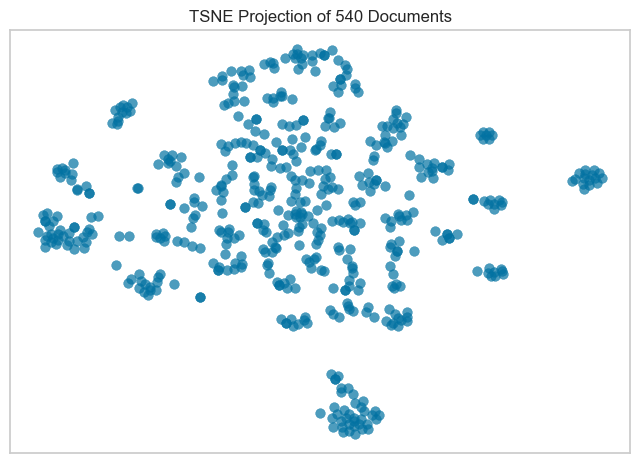

<AxesSubplot:title={'center':'TSNE Projection of 540 Documents'}>

In [49]:
tsne2.fit(tf_idf_result)
tsne2.show()

##### Expert's Opinion

#### Validasi Hasil Clustering

#### Silhouette Plot

In [50]:
from yellowbrick.cluster import SilhouetteVisualizer

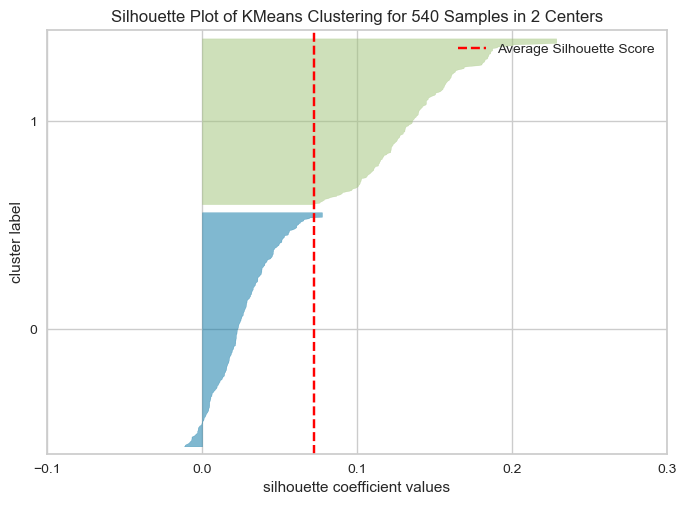

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 540 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [51]:
sil_visualizer_count = SilhouetteVisualizer(KMeans(n_clusters=2,random_state=5), colors='yellowbrick')
sil_visualizer_count.fit(count_result)
sil_visualizer_count.show()        # Finalize and render the figure

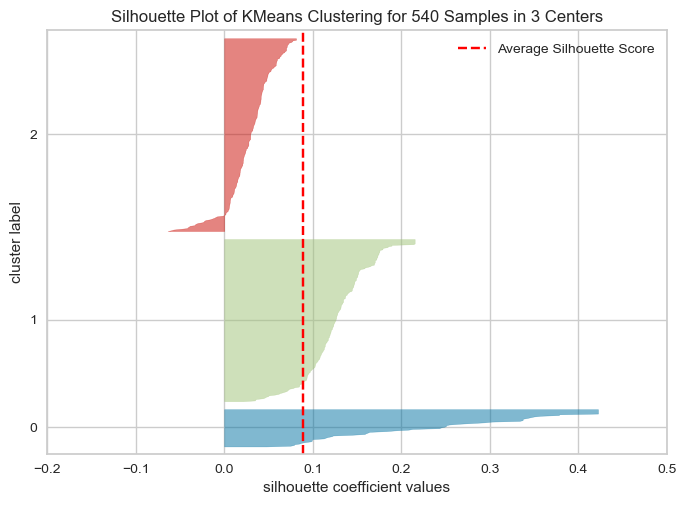

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 540 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [52]:
sil_visualizer_count2 = SilhouetteVisualizer(KMeans(n_clusters=3,random_state=5), colors='yellowbrick')
sil_visualizer_count2.fit(count_result)
sil_visualizer_count2.show()        # Finalize and render the figure

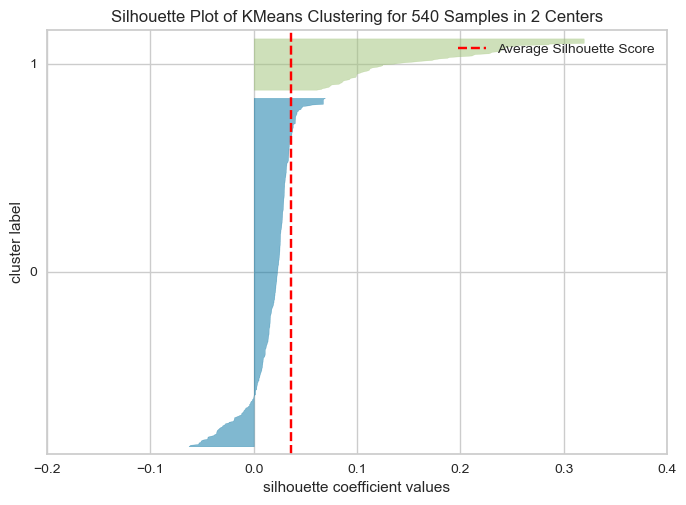

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 540 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [53]:
sil_visualizer_tf_idf = SilhouetteVisualizer(KMeans(n_clusters=2,random_state=5), colors='yellowbrick')
sil_visualizer_tf_idf.fit(tf_idf_result)
sil_visualizer_tf_idf.show()        # Finalize and render the figure

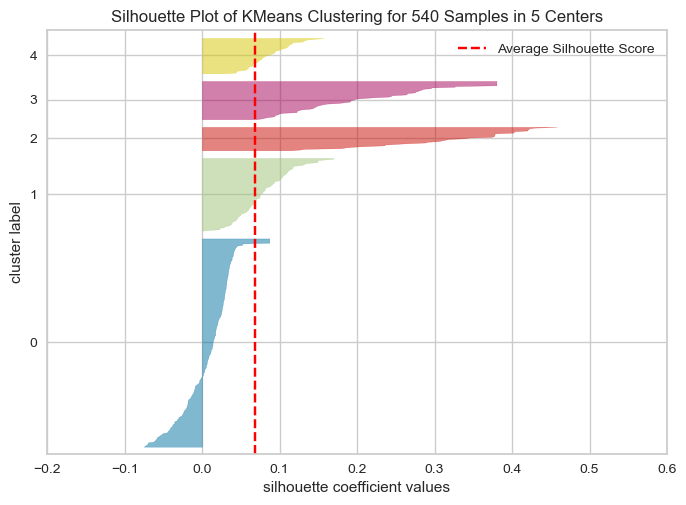

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 540 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [54]:
sil_visualizer_tf_idf2 = SilhouetteVisualizer(KMeans(n_clusters=5,random_state=5), colors='yellowbrick')
sil_visualizer_tf_idf2.fit(tf_idf_result)
sil_visualizer_tf_idf2.show()        # Finalize and render the figure

#### Menerapkan Metode Cluster

##### K-Means dengan Frequency Vectorizer

In [55]:
kmeans_best1 = KMeans(n_clusters=4,random_state=5)
kmeans_best2 = KMeans(n_clusters=5,random_state=5)

In [56]:
kmeans_best1.fit(count_result)
name_column_col1 = count_vectorizer.get_feature_names_out()
pd.DataFrame(kmeans_best1.cluster_centers_[:,0:10],columns=name_column_col1[0:10])

,absen,airlangga,ajak,akrab,andika,anggota,anies,atas,badan,bahas
0,0.000000,0.032787,0.000000,0.000000,0.000000,0.000000,0.508197,0.196721,0.000000,0.000000
1,0.000000,0.004484,0.040359,0.026906,0.000000,0.004484,0.013453,0.013453,0.058296,0.017937
2,0.029412,0.000000,0.000000,0.029412,0.147059,0.088235,0.000000,0.000000,0.000000,0.000000
3,0.018018,0.013514,0.009009,0.009009,0.000000,0.022523,0.013514,0.000000,0.004505,0.027027


In [57]:
kmeans_best2.fit(tf_idf_result)
pd.DataFrame(kmeans_best2.cluster_centers_[:,0:10],columns=name_column_col1[0:10])

,absen,airlangga,ajak,akrab,andika,anggota,anies,atas,badan,bahas
0,0.005746,0.007019,0.019201,0.014120,0.000000,0.003141,0.005348,0.009592,0.019565,0.009510
1,0.000000,0.000000,0.004749,0.004507,0.000000,0.000000,0.000000,0.000000,0.000000,0.005326
2,0.012676,0.000000,0.000000,0.013272,0.077661,0.037091,0.000000,0.000000,0.000000,0.000000
3,0.010859,0.017389,0.000000,0.000000,0.000000,0.000000,0.261866,0.077533,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.035558,0.000000,0.000000,0.000000,0.034990


#### Interpretasi Hasil Cluster

Interpretasi Hasil Cluster menggunakan 10 kata-kata paling penting dari masing-masing kluster. Kata-kata penting ini diukur dengan Frequency dimana semakin besar nilainya maka semakin penting kata tersebut

In [58]:
# extract cluster's label
cluster_label_best1 = pd.DataFrame(kmeans_best1.predict(count_result),columns=["cluster"])
cluster_label_best1.cluster.value_counts()

1    223
3    222
0     61
2     34
Name: cluster, dtype: int64

In [59]:
cluster_label_best2 = pd.DataFrame(kmeans_best2.predict(count_result),columns=["cluster"])
cluster_label_best2.cluster.value_counts()

0    242
1    118
3     91
4     55
2     34
Name: cluster, dtype: int64

In [64]:
count_result_df = pd.DataFrame(count_result.toarray(),
                                columns=count_vectorizer.get_feature_names())
count_result_df.head()

,absen,airlangga,ajak,akrab,andika,anggota,anies,atas,badan,bahas,...,ultah,umum,undangundang,unggah,unggul,usaha,uu,warga,wni,yudo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [65]:
cluster_label_best1 = pd.concat([count_result_df,cluster_label_best1],axis=1)
cluster_label_best1.head()

,absen,airlangga,ajak,akrab,andika,anggota,anies,atas,badan,bahas,...,umum,undangundang,unggah,unggul,usaha,uu,warga,wni,yudo,cluster
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [66]:
cluster_label_best2 = pd.concat([count_result_df,cluster_label_best2],axis=1)
cluster_label_best2.head()

,absen,airlangga,ajak,akrab,andika,anggota,anies,atas,badan,bahas,...,umum,undangundang,unggah,unggul,usaha,uu,warga,wni,yudo,cluster
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [67]:
cluster_label_best_fin1 = pd.melt(cluster_label_best1.groupby("cluster", as_index=False).agg("sum"),
        id_vars=["cluster"],var_name="vocab",value_name="count")
cluster_label_best_fin1["rank"] = cluster_label_best_fin1.groupby("cluster", as_index=False)["count"].rank("first",ascending=False)
cluster_label_best_fin1 = cluster_label_best_fin1.query("rank <= 10")
cluster_label_best_fin1

,cluster,vocab,count,rank
24,0,anies,31,9.0
68,0,capres,33,5.0
95,3,dpr,33,5.0
124,0,ganjar,33,6.0
125,1,ganjar,29,5.0
139,3,gibran,30,7.0
211,3,jokowi,30,8.0
266,2,laksamana,20,9.0
277,1,maharani,21,7.0
298,2,margono,22,7.0


In [68]:
cluster_label_best_fin2 = pd.melt(cluster_label_best2.groupby("cluster", as_index=False).agg("sum"),
        id_vars=["cluster"],var_name="vocab",value_name="count")
cluster_label_best_fin2["rank"] = cluster_label_best_fin2.groupby("cluster", as_index=False)["count"].rank("first",ascending=False)
cluster_label_best_fin2 = cluster_label_best_fin2.query("rank <= 10")
cluster_label_best_fin2

,cluster,vocab,count,rank
22,2,andika,5,9.0
33,3,anies,37,5.0
38,3,atas,12,10.0
40,0,badan,13,10.0
55,0,bem,14,9.0
86,1,capres,27,4.0
88,3,capres,45,3.0
93,3,cawapres,15,7.0
104,4,cipta,9,9.0
109,4,ciptaker,10,6.0


In [70]:
! pip install plotnine

     ---------------------------------------- 1.2/1.2 MB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 64.7/64.7 kB 3.6 MB/s eta 0:00:00
     -------------------------------------- 111.8/111.8 kB 1.6 MB/s eta 0:00:00


In [71]:
from plotnine import ggplot, geom_col, aes, facet_wrap, coords, scales, themes

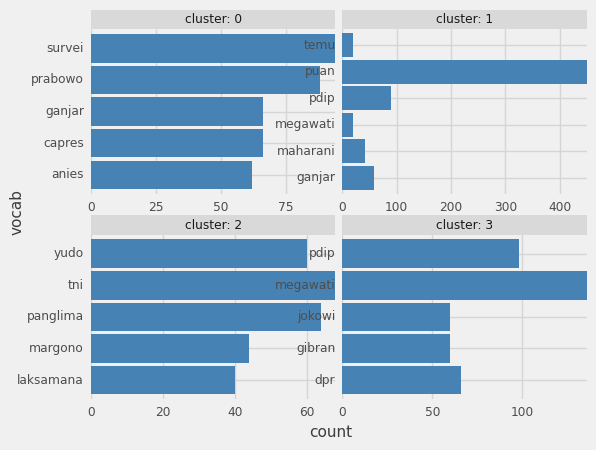

<ggplot: (147564404730)>

In [72]:
(ggplot(cluster_label_best_fin1)+
 geom_col(aes("vocab","count"),fill="steelblue")+
 scales.scale_xy.scale_y_continuous(expand=(0,0))+
 coords.coord_flip()+
 facet_wrap("cluster",scales="free",ncol=2,labeller = 'label_both')+
 themes.theme_538()+
 themes.theme(subplots_adjust={'hspace': 0.25})
 )

Interpretasi Hasil Cluster berdasarkan grafik diatas

- Cluster 0 : Berita tentang hasil survey prabowo, ganjar, dan anies pada pencapresan 2024
- Cluster 1 : Berita tentang ganjar, megawati, puan dalam pencapresan dari partai PDIP
- Cluster 2 : Bertia tentang laksamana panglima TNI
- Cluster 3 : Berita tentang politisi PDIP yaitu Jokowi, Megawati dan Gibran yang menyangkut dengan dpr  

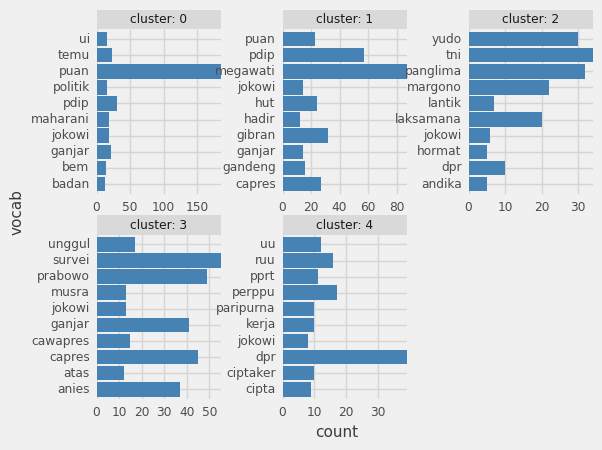

<ggplot: (147564529372)>

In [73]:
(ggplot(cluster_label_best_fin2)+
 geom_col(aes("vocab","count"),fill="steelblue")+
 scales.scale_xy.scale_y_continuous(expand=(0,0))+
 coords.coord_flip()+
 facet_wrap("cluster",scales="free",ncol=3,labeller = 'label_both')+
 themes.theme_538()+
 themes.theme(subplots_adjust={'hspace': 0.25,'wspace': 0.5})
 )

Interpretasi Hasil Cluster berdasarkan grafik diatas

- Cluster 0 : Berita Puan maharani dengan bem ui
- Cluster 1 : Berita Puan maharani menggandeng pasangan untuk pencapresan 2024 
- Cluster 2 : Berita panglima tni yudo margono
- Cluster 3 : Berita survey Prabowo, Anies, dan Ganjar
- Cluster 4 : Berita ruu dan perppu cipta kerja di dpr 
